In [9]:
import numpy as np

# FC Layer Class
class FC:
    def __init__(self, n_input, n_output, initializer, optimizer):
        """
        Initialize a fully connected layer.
        :param n_input: Number of input features (previous layer size)
        :param n_output: Number of neurons in the current layer
        :param initializer: A function to initialize weights and biases
        :param optimizer: An optimizer for updating the weights
        """
        self.n_input = n_input
        self.n_output = n_output
        self.initializer = initializer  # Initialize weights and biases
        self.optimizer = optimizer
        
        # Initialize weights and biases
        self.W, self.B = self.initializer.initialize(n_input, n_output)
        
        # Store input and output for backpropagation
        self.X = None  # To store the input during forward pass
        self.Z = None  # To store the output (activations) during forward pass
        
    def forward(self, X):
        """
        Perform forward pass of the fully connected layer.
        :param X: Input data (shape: [batch_size, n_input])
        :return: Output of the layer (shape: [batch_size, n_output])
        """
        self.X = X
        self.Z = np.dot(X, self.W) + self.B  # Linear transformation: Z = XW + B
        return self.Z
    
    def backward(self, dA):
        """
        Perform backward pass of the fully connected layer.
        :param dA: Gradients of the loss with respect to the output of this layer (shape: [batch_size, n_output])
        :return: Gradients with respect to the input (shape: [batch_size, n_input])
        """
        # Compute gradients for W, B, and input X
        dW = np.dot(self.X.T, dA)  # Gradient of the loss with respect to W
        dB = np.sum(dA, axis=0, keepdims=True)  # Gradient of the loss with respect to B
        dX = np.dot(dA, self.W.T)  # Gradient of the loss with respect to the input X

        # Update weights and biases using the optimizer
        self.optimizer.update(self, dW, dB)

        return dX


In [10]:
class SimpleInitializer:
    def __init__(self, sigma):
        self.sigma = sigma  # Standard deviation for Gaussian distribution
    
    def initialize(self, n_input, n_output):
        """
        Initialize weights and biases.
        :param n_input: Number of input features (size of previous layer)
        :param n_output: Number of output neurons (size of current layer)
        :return: Initialized weights and biases
        """
        W = np.random.randn(n_input, n_output) * self.sigma  # Gaussian initialization
        B = np.zeros((1, n_output))  # Bias initialized to zero
        return W, B


In [11]:
# Initialize and use FC layers
n_features = 784  # Example input size (e.g., 28x28 image flattened)
n_nodes1 = 64  # Number of neurons in the first hidden layer
n_nodes2 = 32  # Number of neurons in the second hidden layer
n_output = 10  # Number of output classes (e.g., for MNIST)

# Create an instance of the optimizer and initializer
optimizer = SGD(lr=0.01)
initializer = SimpleInitializer(sigma=0.01)

# Create FC layers
FC1 = FC(n_features, n_nodes1, initializer, optimizer)
activation1 = Tanh()  # Example activation function

FC2 = FC(n_nodes1, n_nodes2, initializer, optimizer)
activation2 = Tanh()

FC3 = FC(n_nodes2, n_output, initializer, optimizer)
activation3 = Softmax()  # Softmax for the output layer (classification)

# Forward pass
X_train = np.random.randn(100, n_features)  # Example input batch (100 samples)
A1 = FC1.forward(X_train)
Z1 = activation1.forward(A1)

A2 = FC2.forward(Z1)
Z2 = activation2.forward(A2)

A3 = FC3.forward(Z2)
Z3 = activation3.forward(A3)

# Backward pass
Y_train = np.random.randn(100, n_output)  # Example one-hot encoded labels
dA3 = activation3.backward(Z3, Y_train)
dZ2 = FC3.backward(dA3)
dA2 = activation2.backward(dZ2)
dZ1 = FC2.backward(dA2)
dA1 = activation1.backward(dZ1)
dZ0 = FC1.backward(dA1)  # Final gradient (for backpropagation)


In [12]:
import numpy as np

class SimpleInitializer:
    def __init__(self, sigma):
        """
        Initialize the SimpleInitializer class with the given standard deviation (sigma).
        :param sigma: Standard deviation for Gaussian weight initialization.
        """
        self.sigma = sigma
    
    def initialize(self, n_input, n_output):
        """
        Initialize weights and biases for the given layer size.
        :param n_input: Number of input neurons (size of the previous layer).
        :param n_output: Number of output neurons (size of the current layer).
        :return: Initialized weights (W) and biases (B).
        """
        W = np.random.randn(n_input, n_output) * self.sigma  # Gaussian initialization for weights
        B = np.zeros((1, n_output))  # Bias initialized to zero
        return W, B


In [13]:
class FC:
    def __init__(self, n_input, n_output, initializer, optimizer):
        """
        Initialize a fully connected layer.
        :param n_input: Number of input neurons (size of the previous layer)
        :param n_output: Number of output neurons (size of the current layer)
        :param initializer: Instance of an initializer class (e.g., SimpleInitializer)
        :param optimizer: An optimizer for updating the weights (e.g., SGD)
        """
        self.n_input = n_input
        self.n_output = n_output
        self.initializer = initializer  # The initializer instance passed to the constructor
        self.optimizer = optimizer  # The optimizer instance (e.g., SGD)
        
        # Initialize weights and biases using the initializer
        self.W, self.B = self.initializer.initialize(n_input, n_output)
        
        # Store input and output for backpropagation
        self.X = None  # To store the input during the forward pass
        self.Z = None  # To store the output (activations) during the forward pass
        
    def forward(self, X):
        """
        Perform the forward pass of the fully connected layer.
        :param X: Input data (shape: [batch_size, n_input])
        :return: Output of the layer (shape: [batch_size, n_output])
        """
        self.X = X
        self.Z = np.dot(X, self.W) + self.B  # Linear transformation: Z = XW + B
        return self.Z
    
    def backward(self, dA):
        """
        Perform the backward pass of the fully connected layer.
        :param dA: Gradients of the loss with respect to the output of this layer (shape: [batch_size, n_output])
        :return: Gradients with respect to the input (shape: [batch_size, n_input])
        """
        # Compute gradients for W, B, and input X
        dW = np.dot(self.X.T, dA)  # Gradient of the loss with respect to W
        dB = np.sum(dA, axis=0, keepdims=True)  # Gradient of the loss with respect to B
        dX = np.dot(dA, self.W.T)  # Gradient of the loss with respect to the input X

        # Update weights and biases using the optimizer
        self.optimizer.update(self, dW, dB)

        return dX


In [14]:
# Initialize parameters
n_features = 784  # Example input size (e.g., 28x28 image flattened)
n_nodes1 = 64  # Number of neurons in the first hidden layer
n_nodes2 = 32  # Number of neurons in the second hidden layer
n_output = 10  # Number of output classes (e.g., for MNIST)

# Create an instance of the SimpleInitializer with a given standard deviation
initializer = SimpleInitializer(sigma=0.01)

# Create an optimizer instance (e.g., SGD with learning rate 0.01)
optimizer = SGD(lr=0.01)

# Create fully connected layers, passing the initializer to each layer
FC1 = FC(n_features, n_nodes1, initializer, optimizer)
activation1 = Tanh()  # Example activation function (Tanh)

FC2 = FC(n_nodes1, n_nodes2, initializer, optimizer)
activation2 = Tanh()

FC3 = FC(n_nodes2, n_output, initializer, optimizer)
activation3 = Softmax()  # Softmax for the output layer (classification)

# Forward pass with dummy input
X_train = np.random.randn(100, n_features)  # Example input batch (100 samples)
A1 = FC1.forward(X_train)
Z1 = activation1.forward(A1)

A2 = FC2.forward(Z1)
Z2 = activation2.forward(A2)

A3 = FC3.forward(Z2)
Z3 = activation3.forward(A3)

# Backward pass with dummy labels (Y_train would be one-hot encoded)
Y_train = np.random.randn(100, n_output)  # Example one-hot encoded labels
dA3 = activation3.backward(Z3, Y_train)
dZ2 = FC3.backward(dA3)
dA2 = activation2.backward(dZ2)
dZ1 = FC2.backward(dA2)
dA1 = activation1.backward(dZ1)
dZ0 = FC1.backward(dA1)  # Final gradient (for backpropagation)


In [15]:
class SGD:
    def __init__(self, lr):
        """
        Initialize the Stochastic Gradient Descent (SGD) optimizer.
        :param lr: Learning rate for the optimizer.
        """
        self.lr = lr

    def update(self, layer, dW, dB):
        """
        Update the weights and biases using the gradients computed during backpropagation.
        :param layer: The layer whose weights are to be updated (FC layer).
        :param dW: Gradient of the loss with respect to the weights.
        :param dB: Gradient of the loss with respect to the biases.
        """
        # Update the weights and biases
        layer.W -= self.lr * dW
        layer.B -= self.lr * dB


In [16]:
class FC:
    def __init__(self, n_input, n_output, initializer, optimizer):
        """
        Initialize a fully connected layer.
        :param n_input: Number of input neurons (size of the previous layer)
        :param n_output: Number of output neurons (size of the current layer)
        :param initializer: Instance of an initializer class (e.g., SimpleInitializer)
        :param optimizer: An optimizer for updating the weights (e.g., SGD)
        """
        self.n_input = n_input
        self.n_output = n_output
        self.initializer = initializer  # The initializer instance passed to the constructor
        self.optimizer = optimizer  # The optimizer instance (e.g., SGD)
        
        # Initialize weights and biases using the initializer
        self.W, self.B = self.initializer.initialize(n_input, n_output)
        
        # Store input and output for backpropagation
        self.X = None  # To store the input during the forward pass
        self.Z = None  # To store the output (activations) during the forward pass
        
    def forward(self, X):
        """
        Perform the forward pass of the fully connected layer.
        :param X: Input data (shape: [batch_size, n_input])
        :return: Output of the layer (shape: [batch_size, n_output])
        """
        self.X = X
        self.Z = np.dot(X, self.W) + self.B  # Linear transformation: Z = XW + B
        return self.Z
    
    def backward(self, dA):
        """
        Perform the backward pass of the fully connected layer.
        :param dA: Gradients of the loss with respect to the output of this layer (shape: [batch_size, n_output])
        :return: Gradients with respect to the input (shape: [batch_size, n_input])
        """
        # Compute gradients for W, B, and input X
        dW = np.dot(self.X.T, dA)  # Gradient of the loss with respect to W
        dB = np.sum(dA, axis=0, keepdims=True)  # Gradient of the loss with respect to B
        dX = np.dot(dA, self.W.T)  # Gradient of the loss with respect to the input X

        # Update weights and biases using the optimizer
        self.optimizer.update(self, dW, dB)

        return dX


In [17]:
# Example initialization
n_features = 784  # Input size (e.g., for MNIST dataset)
n_nodes1 = 64  # Number of neurons in the first hidden layer
n_nodes2 = 32  # Number of neurons in the second hidden layer
n_output = 10  # Number of output classes (e.g., for MNIST)

# Create an instance of the SimpleInitializer with a given standard deviation
initializer = SimpleInitializer(sigma=0.01)

# Create an instance of the SGD optimizer with a learning rate
optimizer = SGD(lr=0.01)

# Create fully connected layers, passing the initializer and optimizer to each layer
FC1 = FC(n_features, n_nodes1, initializer, optimizer)
activation1 = Tanh()  # Example activation function (Tanh)

FC2 = FC(n_nodes1, n_nodes2, initializer, optimizer)
activation2 = Tanh()

FC3 = FC(n_nodes2, n_output, initializer, optimizer)
activation3 = Softmax()  # Softmax for the output layer (classification)

# Forward pass with dummy input
X_train = np.random.randn(100, n_features)  # Example input batch (100 samples)
A1 = FC1.forward(X_train)
Z1 = activation1.forward(A1)

A2 = FC2.forward(Z1)
Z2 = activation2.forward(A2)

A3 = FC3.forward(Z2)
Z3 = activation3.forward(A3)

# Backward pass with dummy labels (Y_train would be one-hot encoded)
Y_train = np.random.randn(100, n_output)  # Example one-hot encoded labels
dA3 = activation3.backward(Z3, Y_train)
dZ2 = FC3.backward(dA3)
dA2 = activation2.backward(dZ2)
dZ1 = FC2.backward(dA2)
dA1 = activation1.backward(dZ1)
dZ0 = FC1.backward(dA1)  # Final gradient (for backpropagation)


In [18]:
class Tanh:
    def forward(self, Z):
        """Compute the forward pass for the Tanh activation."""
        self.Z = Z
        return np.tanh(Z)
    
    def backward(self, dA):
        """Compute the backward pass for the Tanh activation."""
        return dA * (1 - np.tanh(self.Z)**2)  # Derivative of Tanh

class ReLU:
    def forward(self, Z):
        """Compute the forward pass for the ReLU activation."""
        self.Z = Z
        return np.maximum(0, Z)
    
    def backward(self, dA):
        """Compute the backward pass for the ReLU activation."""
        return dA * (self.Z > 0)  # Derivative of ReLU

class Softmax:
    def forward(self, Z):
        """Compute the forward pass for the Softmax activation."""
        exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))  # Stability trick
        self.A = exp_Z / np.sum(exp_Z, axis=1, keepdims=True)  # Softmax
        return self.A
    
    def backward(self, dA, Y):
        """Compute the backward pass for the Softmax activation (with cross-entropy)."""
        # Simplified backpropagation for Softmax + Cross-Entropy
        m = Y.shape[0]  # Number of samples
        dZ = self.A - Y  # Simplified derivative (Softmax + Cross-Entropy)
        return dZ / m  # Gradient w.r.t the input to the Softmax layer


In [19]:
class FC:
    def __init__(self, n_input, n_output, initializer, optimizer, activation=None):
        """
        Initialize a fully connected layer.
        :param n_input: Number of input neurons
        :param n_output: Number of output neurons
        :param initializer: Instance of an initializer class (e.g., SimpleInitializer)
        :param optimizer: An optimizer class (e.g., SGD)
        :param activation: An activation function instance (e.g., Tanh, ReLU, Softmax)
        """
        self.n_input = n_input
        self.n_output = n_output
        self.initializer = initializer
        self.optimizer = optimizer
        self.activation = activation  # Optional activation (e.g., Tanh, Softmax)
        
        # Initialize weights and biases
        self.W, self.B = self.initializer.initialize(n_input, n_output)
        
        # Store input and output for backpropagation
        self.X = None
        self.Z = None

    def forward(self, X):
        """Perform forward pass of the fully connected layer."""
        self.X = X
        self.Z = np.dot(X, self.W) + self.B  # Linear transformation: Z = XW + B
        
        if self.activation:
            # Apply activation function if provided (e.g., Tanh, ReLU, Softmax)
            return self.activation.forward(self.Z)
        return self.Z  # If no activation is specified (for output layer, usually Softmax)

    def backward(self, dA):
        """Perform the backward pass of the fully connected layer."""
        # Compute gradients for W, B, and input X
        dW = np.dot(self.X.T, dA)  # Gradient of the loss with respect to W
        dB = np.sum(dA, axis=0, keepdims=True)  # Gradient of the loss with respect to B
        dX = np.dot(dA, self.W.T)  # Gradient of the loss with respect to the input X

        # Update weights and biases using the optimizer
        self.optimizer.update(self, dW, dB)

        return dX


In [20]:
# Example setup
n_features = 784  # Number of input features (e.g., for MNIST dataset)
n_nodes1 = 64
n_nodes2 = 32
n_output = 10  # Number of output classes (e.g., 10 classes for MNIST)

# Initialize layers and activation functions
initializer = SimpleInitializer(sigma=0.01)
optimizer = SGD(lr=0.01)

activation1 = Tanh()
activation2 = Tanh()
activation3 = Softmax()  # Softmax on the output layer

# Create layers
FC1 = FC(n_features, n_nodes1, initializer, optimizer, activation1)
FC2 = FC(n_nodes1, n_nodes2, initializer, optimizer, activation2)
FC3 = FC(n_nodes2, n_output, initializer, optimizer, activation3)

# Forward pass with dummy data
X_train = np.random.randn(100, n_features)  # Example input data (100 samples)
A1 = FC1.forward(X_train)
Z1 = activation1.forward(A1)

A2 = FC2.forward(Z1)
Z2 = activation2.forward(A2)

A3 = FC3.forward(Z2)
Z3 = activation3.forward(A3)

# Backward pass with dummy labels (one-hot encoded)
Y_train = np.random.randn(100, n_output)  # Example one-hot encoded labels
dA3 = activation3.backward(Z3, Y_train)
dZ2 = FC3.backward(dA3)
dA2 = activation2.backward(dZ2)
dZ1 = FC2.backward(dA2)
dA1 = activation1.backward(dZ1)
dZ0 = FC1.backward(dA1)  # Final gradients


In [21]:
import numpy as np

class ReLU:
    def forward(self, Z):
        """
        Compute the forward pass for the ReLU activation function.
        
        :param Z: Input matrix (or vector) from the previous layer
        :return: Output after applying ReLU
        """
        self.Z = Z
        return np.maximum(0, Z)  # ReLU operation

    def backward(self, dA):
        """
        Compute the backward pass for the ReLU activation function.
        
        :param dA: Gradient of the loss with respect to the output of this layer
        :return: Gradient of the loss with respect to the input to this layer
        """
        dZ = dA * (self.Z > 0)  # Gradient is 1 for positive values and 0 for non-positive values
        return dZ


In [22]:
# Initialize ReLU activation
relu = ReLU()

# Example input (Z) from a previous layer
Z = np.array([[1, -2, 3], [-1, 4, -5]])

# Forward pass (applying ReLU)
A = relu.forward(Z)
print("Forward Pass Output (ReLU applied):\n", A)

# Assume some gradient from the next layer (dA)
dA = np.array([[0.5, 0.3, -0.2], [-0.1, 0.4, 0.6]])

# Backward pass (computing gradient)
dZ = relu.backward(dA)
print("Backward Pass Output (Gradient with respect to input):\n", dZ)


Forward Pass Output (ReLU applied):
 [[1 0 3]
 [0 4 0]]
Backward Pass Output (Gradient with respect to input):
 [[ 0.5  0.  -0.2]
 [-0.   0.4  0. ]]


In [23]:
import numpy as np

class XavierInitializer:
    def __init__(self):
        pass
    
    def initialize(self, n_in, n_out):
        """
        Initialize weights using Xavier (Glorot) initialization.
        
        :param n_in: Number of nodes in the previous layer (input layer)
        :param n_out: Number of nodes in the current layer (output layer)
        :return: Initialized weights (W) and biases (B)
        """
        # Xavier initialization for weights
        sigma = np.sqrt(1 / n_in)
        W = np.random.randn(n_in, n_out) * sigma
        b = np.zeros((1, n_out))  # Biases are initialized to zero
        
        return W, b

class HeInitializer:
    def __init__(self):
        pass
    
    def initialize(self, n_in, n_out):
        """
        Initialize weights using He initialization.
        
        :param n_in: Number of nodes in the previous layer (input layer)
        :param n_out: Number of nodes in the current layer (output layer)
        :return: Initialized weights (W) and biases (B)
        """
        # He initialization for weights
        sigma = np.sqrt(2 / n_in)
        W = np.random.randn(n_in, n_out) * sigma
        b = np.zeros((1, n_out))  # Biases are initialized to zero
        
        return W, b


In [24]:
# Example to initialize weights and biases for a fully connected layer
n_in = 64  # Number of nodes in the previous layer
n_out = 32  # Number of nodes in the current layer

# Xavier Initialization
xavier_initializer = XavierInitializer()
W_xavier, b_xavier = xavier_initializer.initialize(n_in, n_out)
print("Xavier Weights:\n", W_xavier)
print("Xavier Biases:\n", b_xavier)

# He Initialization
he_initializer = HeInitializer()
W_he, b_he = he_initializer.initialize(n_in, n_out)
print("He Weights:\n", W_he)
print("He Biases:\n", b_he)


Xavier Weights:
 [[ 0.0861857  -0.16266965 -0.05053302 ... -0.11015829 -0.21492996
  -0.02172654]
 [-0.00898772 -0.032822    0.04810001 ... -0.16419665  0.03569282
  -0.0476632 ]
 [-0.06455605 -0.06852041 -0.15221713 ...  0.04357356 -0.24574617
   0.12336446]
 ...
 [ 0.14367959 -0.00755765  0.02849192 ...  0.09332801 -0.10079359
   0.06397672]
 [ 0.10209337 -0.11952592 -0.04900946 ... -0.07109031  0.10700888
   0.18193744]
 [ 0.27755491 -0.01005078 -0.04006266 ... -0.28830225 -0.01350839
   0.23071344]]
Xavier Biases:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]
He Weights:
 [[-0.02375718  0.15438857 -0.1002378  ...  0.09070818  0.11184704
   0.06930497]
 [-0.19374164 -0.06927836 -0.1940407  ... -0.14169279 -0.00745281
   0.12793834]
 [-0.01553759  0.19700859 -0.04733803 ...  0.16412604 -0.00957297
   0.26285529]
 ...
 [-0.10906135 -0.32989565  0.05869485 ...  0.04734687 -0.24893115
   0.09299013]
 [ 0.10717501 -0.11926985  0.03

In [25]:
import numpy as np

class AdaGrad:
    def __init__(self, lr=0.01, epsilon=1e-7):
        """
        Initialize AdaGrad optimizer.

        :param lr: Learning rate (α)
        :param epsilon: Small constant to avoid division by zero
        """
        self.lr = lr  # Initial learning rate
        self.epsilon = epsilon  # Stability constant
        self.h = {}  # Dictionary to store sum of squared gradients for each parameter
    
    def update(self, layer):
        """
        Update the parameters of a given layer using AdaGrad.

        :param layer: Layer object containing weights, biases, and their gradients
        """
        if id(layer) not in self.h:
            # Initialize sum of squared gradients for weights and biases
            self.h[id(layer)] = {
                "W": np.zeros_like(layer.W),
                "b": np.zeros_like(layer.b)
            }
        
        # Accumulate squared gradients
        self.h[id(layer)]["W"] += layer.dW**2
        self.h[id(layer)]["b"] += layer.db**2
        
        # Update weights and biases
        layer.W -= self.lr / (np.sqrt(self.h[id(layer)]["W"]) + self.epsilon) * layer.dW
        layer.b -= self.lr / (np.sqrt(self.h[id(layer)]["b"]) + self.epsilon) * layer.db


In [26]:
# Assuming a Layer class exists with attributes: W, b, dW, db
class Layer:
    def __init__(self, input_size, output_size, initializer):
        self.W, self.b = initializer.initialize(input_size, output_size)
        self.dW = None  # Placeholder for weight gradients
        self.db = None  # Placeholder for bias gradients

# Initialize a layer and AdaGrad optimizer
n_in, n_out = 64, 32
initializer = XavierInitializer()
layer = Layer(n_in, n_out, initializer)

optimizer = AdaGrad(lr=0.01)

# Example: Perform an update (assuming gradients are calculated elsewhere)
layer.dW = np.random.randn(n_in, n_out)  # Example gradient
layer.db = np.random.randn(1, n_out)    # Example gradient

optimizer.update(layer)

# Check updated weights and biases
print("Updated Weights:\n", layer.W)
print("Updated Biases:\n", layer.b)


Updated Weights:
 [[-0.02254251  0.21585949 -0.20442313 ...  0.12405564 -0.15554432
  -0.12719871]
 [ 0.12488547  0.0889455   0.24226959 ...  0.00848193 -0.0721986
   0.0312244 ]
 [-0.12826705 -0.21338198  0.11751475 ... -0.07816784 -0.09365522
  -0.03190996]
 ...
 [ 0.08845041  0.00965569  0.16206553 ...  0.06791312  0.03962841
  -0.0807056 ]
 [-0.01634398  0.08789393  0.07498233 ...  0.0900876   0.08573556
   0.25233455]
 [ 0.00835489  0.076099    0.12832031 ...  0.08412204  0.09289088
   0.11231759]]
Updated Biases:
 [[-0.01       -0.01        0.01        0.00999992 -0.01        0.01
   0.01       -0.01        0.01        0.01       -0.01        0.01
   0.01       -0.01       -0.00999999 -0.00999996  0.01       -0.01
   0.00999999  0.01        0.01       -0.01        0.01        0.01
   0.00999973  0.01       -0.01        0.01        0.01        0.01
   0.01       -0.01      ]]


In [27]:
import numpy as np

class ScratchDeepNeuralNetworkClassifier:
    def __init__(self, n_features, n_nodes_list, n_output, initializer, optimizer, activations, lr=0.01):
        """
        Initialize a deep neural network classifier.
        
        :param n_features: Number of input features.
        :param n_nodes_list: List containing the number of nodes for each hidden layer.
        :param n_output: Number of output classes.
        :param initializer: Initializer instance for weights.
        :param optimizer: Optimizer instance for gradient descent.
        :param activations: List of activation function instances for each layer (including the output layer).
        :param lr: Learning rate (used by the optimizer).
        """
        self.lr = lr
        self.layers = []
        self.activations = activations

        # Build the layers of the neural network
        input_dim = n_features
        for nodes, activation in zip(n_nodes_list, activations[:-1]):
            self.layers.append(Layer(input_dim, nodes, initializer, optimizer))
            input_dim = nodes  # Update input dimension for the next layer

        # Add the output layer
        self.layers.append(Layer(input_dim, n_output, initializer, optimizer))

    def forward(self, X):
        """
        Perform a forward pass through the network.

        :param X: Input data.
        :return: Output of the final layer.
        """
        self.inputs = [X]
        for layer, activation in zip(self.layers, self.activations):
            X = layer.forward(X)
            X = activation.forward(X)
            self.inputs.append(X)  # Save intermediate outputs for backpropagation
        return X

    def backward(self, y_pred, y_true):
        """
        Perform a backward pass through the network.

        :param y_pred: Predicted output (from the forward pass).
        :param y_true: True labels (one-hot encoded).
        """
        # Compute the initial gradient using the softmax + cross-entropy derivative
        dA = self.activations[-1].backward(y_pred, y_true)

        # Backpropagate through each layer
        for i in reversed(range(len(self.layers))):
            dA = self.activations[i].backward(dA)
            dA = self.layers[i].backward(dA)

    def fit(self, X_train, y_train, epochs):
        """
        Train the neural network.

        :param X_train: Training data (features).
        :param y_train: Training labels (one-hot encoded).
        :param epochs: Number of epochs to train for.
        """
        for epoch in range(epochs):
            # Forward pass
            y_pred = self.forward(X_train)
            
            # Backward pass
            self.backward(y_pred, y_train)

            # Calculate and print loss every 100 epochs
            if epoch % 100 == 0:
                loss = -np.mean(y_train * np.log(y_pred + 1e-7))  # Cross-entropy loss
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        """
        Predict class labels for the input data.

        :param X: Input data.
        :return: Predicted class labels.
        """
        y_pred = self.forward(X)
        return np.argmax(y_pred, axis=1)

    def predict_proba(self, X):
        """
        Predict probabilities for the input data.

        :param X: Input data.
        :return: Predicted class probabilities.
        """
        return self.forward(X)


In [28]:
class Layer:
    def __init__(self, input_size, output_size, initializer, optimizer):
        """
        Initialize a fully connected layer.

        :param input_size: Number of input features.
        :param output_size: Number of nodes in the layer.
        :param initializer: Initializer instance for weights.
        :param optimizer: Optimizer instance for updating parameters.
        """
        self.W, self.b = initializer.initialize(input_size, output_size)
        self.optimizer = optimizer
        self.dW = None  # Placeholder for weight gradients
        self.db = None  # Placeholder for bias gradients
        self.X = None   # Placeholder for input to the layer

    def forward(self, X):
        """
        Perform the forward pass through the layer.

        :param X: Input to the layer.
        :return: Output of the layer.
        """
        self.X = X
        return np.dot(X, self.W) + self.b

    def backward(self, dA):
        """
        Perform the backward pass through the layer.

        :param dA: Gradient of the loss with respect to the layer's output.
        :return: Gradient of the loss with respect to the layer's input.
        """
        self.dW = np.dot(self.X.T, dA) / self.X.shape[0]
        self.db = np.sum(dA, axis=0, keepdims=True) / self.X.shape[0]
        dX = np.dot(dA, self.W.T)
        self.optimizer.update(self)  # Update weights and biases
        return dX


In [29]:
class ReLU:
    def forward(self, X):
        self.Z = X
        return np.maximum(0, X)

    def backward(self, dA):
        return dA * (self.Z > 0)

class SoftmaxWithCrossEntropy:
    def forward(self, X):
        exp_X = np.exp(X - np.max(X, axis=1, keepdims=True))
        self.output = exp_X / np.sum(exp_X, axis=1, keepdims=True)
        return self.output

    def backward(self, y_pred, y_true):
        return (y_pred - y_true) / y_true.shape[0]


In [30]:
class XavierInitializer:
    def initialize(self, input_size, output_size):
        W = np.random.randn(input_size, output_size) / np.sqrt(input_size)
        b = np.zeros((1, output_size))
        return W, b

class HeInitializer:
    def initialize(self, input_size, output_size):
        W = np.random.randn(input_size, output_size) * np.sqrt(2 / input_size)
        b = np.zeros((1, output_size))
        return W, b


In [31]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, layer):
        layer.W -= self.lr * layer.dW
        layer.b -= self.lr * layer.db


In [32]:
# Define parameters
n_features = 10
n_nodes_list = [64, 32]
n_output = 3
epochs = 1000

# Initialize components
initializer = HeInitializer()
optimizer = SGD(lr=0.01)
activations = [ReLU(), ReLU(), SoftmaxWithCrossEntropy()]

# Create the model
model = ScratchDeepNeuralNetworkClassifier(
    n_features=n_features, 
    n_nodes_list=n_nodes_list, 
    n_output=n_output, 
    initializer=initializer, 
    optimizer=optimizer, 
    activations=activations
)

# Example data
X_train = np.random.randn(100, n_features)
Y_train = np.eye(n_output)[np.random.choice(n_output, 100)]  # One-hot encoded labels

# Train the model
model.fit(X_train, Y_train, epochs)

# Predict
predictions = model.predict(X_train)
print("Predictions:", predictions)


TypeError: SoftmaxWithCrossEntropy.backward() missing 1 required positional argument: 'y_true'

In [33]:
def backward(self, y_pred, y_true):
    """
    Perform a backward pass through the network.

    :param y_pred: Predicted output (from the forward pass).
    :param y_true: True labels (one-hot encoded).
    """
    # Compute the initial gradient for the last layer (Softmax + Cross-Entropy)
    dA = self.activations[-1].backward(y_pred, y_true)

    # Backpropagate through each hidden layer
    for i in reversed(range(len(self.layers) - 1)):
        dA = self.activations[i].backward(dA)
        dA = self.layers[i].backward(dA)


In [34]:
class SoftmaxWithCrossEntropy:
    def forward(self, X):
        exp_X = np.exp(X - np.max(X, axis=1, keepdims=True))
        self.output = exp_X / np.sum(exp_X, axis=1, keepdims=True)
        return self.output

    def backward(self, y_pred, y_true):
        """
        Compute gradient for Softmax + Cross-Entropy.
        """
        return (y_pred - y_true) / y_true.shape[0]


In [36]:
import numpy as np

class ScratchDeepNeuralNetworkClassifier:
    def __init__(self, n_features, n_nodes_list, n_output, activations, initializers, optimizers, lr=0.01):
        """
        Initialize the deep neural network classifier.

        Parameters:
        - n_features: int, number of input features
        - n_nodes_list: list, number of nodes in each hidden layer
        - n_output: int, number of output classes
        - activations: list, activation function instances (one per layer)
        - initializers: list, initializer instances (one per layer)
        - optimizers: list, optimizer instances (one per layer)
        - lr: float, learning rate
        """
        self.lr = lr
        self.layers = []
        self.activations = activations

        # Create layers (hidden + output)
        n_layers = len(n_nodes_list)
        layer_sizes = [n_features] + n_nodes_list + [n_output]

        for i in range(len(layer_sizes) - 1):
            self.layers.append(
                FullyConnectedLayer(
                    n_input=layer_sizes[i],
                    n_output=layer_sizes[i + 1],
                    initializer=initializers[i],
                    optimizer=optimizers[i]
                )
            )

    def forward(self, X):
        """Perform forward propagation."""
        A = X
        for layer, activation in zip(self.layers, self.activations):
            Z = layer.forward(A)
            A = activation.forward(Z)
        return A

    def backward(self, y_pred, y_true):
        """Perform backward propagation."""
        # Start with the output layer gradient (Softmax + Cross-Entropy)
        dA = self.activations[-1].backward(y_pred, y_true)

        # Backpropagate through each layer
        for i in reversed(range(len(self.layers))):
            dA = self.layers[i].backward(dA)
            dA = self.activations[i - 1].backward(dA) if i > 0 else dA

    def fit(self, X_train, y_train, epochs=1000):
        """Train the model using the provided data."""
        for epoch in range(epochs):
            # Forward pass
            y_pred = self.forward(X_train)

            # Backward pass
            self.backward(y_pred, y_train)

            # Calculate and print loss every 100 epochs
            if epoch % 100 == 0:
                loss = self.calculate_loss(y_train, y_pred)
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        """Make predictions for the input data."""
        y_pred = self.forward(X)
        return np.argmax(y_pred, axis=1)

    def calculate_loss(self, y_true, y_pred):
        """Calculate cross-entropy loss."""
        return -np.mean(np.sum(y_true * np.log(y_pred + 1e-7), axis=1))


# Supporting classes
class FullyConnectedLayer:
    def __init__(self, n_input, n_output, initializer, optimizer):
        self.n_input = n_input
        self.n_output = n_output

        # Initialize weights and biases
        self.W = initializer.initialize_weights(n_input, n_output)
        self.B = initializer.initialize_biases(n_output)

        # Optimizer
        self.optimizer = optimizer

    def forward(self, X):
        self.X = X
        self.Z = np.dot(X, self.W) + self.B
        return self.Z

    def backward(self, dZ):
        dW = np.dot(self.X.T, dZ) / self.X.shape[0]
        dB = np.sum(dZ, axis=0, keepdims=True) / self.X.shape[0]
        dX = np.dot(dZ, self.W.T)

        # Update weights and biases
        self.W = self.optimizer.update(self.W, dW)
        self.B = self.optimizer.update(self.B, dB)

        return dX


class SoftmaxWithCrossEntropy:
    def forward(self, Z):
        exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
        self.A = exp_Z / np.sum(exp_Z, axis=1, keepdims=True)
        return self.A

    def backward(self, y_pred, y_true):
        return (y_pred - y_true) / y_true.shape[0]


class ReLU:
    def forward(self, Z):
        self.Z = Z
        return np.maximum(0, Z)

    def backward(self, dA):
        return dA * (self.Z > 0)


class XavierInitializer:
    def initialize_weights(self, n_input, n_output):
        return np.random.randn(n_input, n_output) * np.sqrt(1 / n_input)

    def initialize_biases(self, n_output):
        return np.zeros((1, n_output))


class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None

    def update(self, param, grad):
        if self.h is None:
            self.h = np.zeros_like(grad)
        self.h += grad ** 2
        adjusted_lr = self.lr / (np.sqrt(self.h) + 1e-7)
        return param - adjusted_lr * grad


In [37]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Ensure reproducibility
np.random.seed(42)


In [39]:
def train_and_evaluate(X_train, y_train, X_val, y_val, n_features, n_output, layer_configs, initializer, optimizer, epochs=10):
    """
    Train and evaluate a deep neural network.

    Parameters:
        X_train: Training features
        y_train: Training labels (one-hot encoded)
        X_val: Validation features
        y_val: Validation labels (one-hot encoded)
        n_features: Number of features in the input
        n_output: Number of output classes
        layer_configs: List of tuples [(n_nodes, activation), ...]
        initializer: Weight initializer instance
        optimizer: Optimizer instance
        epochs: Number of training epochs

    Returns:
        accuracy: Validation accuracy
    """
    # Create the neural network
    model = ScratchDeepNeuralNetworkClassifier(
        n_features=n_features,
        n_nodes_list=[config[0] for config in layer_configs],
        n_output=n_output,
        activations=[config[1] for config in layer_configs],
        initializer=initializer,
        optimizer=optimizer,
    )
    
    # Train the model
    model.fit(X_train, y_train, epochs=epochs)

    # Predict on validation set
    predictions = model.predict(X_val)
    y_pred = np.argmax(predictions, axis=1)
    y_true = np.argmax(y_val, axis=1)

    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    return accuracy


In [47]:
y = mnist.target.astype(int)  # Replace np.int with the built-in int

In [48]:
y = mnist.target.astype(np.int32)  # or np.int64, depending on the requirement

In [54]:
def train_and_evaluate(X_train, y_train, X_val, y_val, n_features, n_output, layer_configs, initializer, optimizer, epochs=10):
    """
    Train and evaluate a deep neural network.

    Parameters:
        X_train: Training features
        y_train: Training labels (one-hot encoded)
        X_val: Validation features
        y_val: Validation labels (one-hot encoded)
        n_features: Number of features in the input
        n_output: Number of output classes
        layer_configs: List of tuples [(n_nodes, activation), ...]
        initializer: Weight initializer instance
        optimizer: Optimizer instance
        epochs: Number of training epochs

    Returns:
        accuracy: Validation accuracy
    """
    # Create the neural network
    model = ScratchDeepNeuralNetworkClassifier(
        n_features=n_features,
        n_nodes_list=[config[0] for config in layer_configs],
        n_output=n_output,
        activations=[config[1] for config in layer_configs],
        initializer=initializer,
        optimizer=optimizer,
    )
    
    # Train the model
    model.fit(X_train, y_train, epochs=epochs)

    # Predict on validation set
    predictions = model.predict(X_val)
    y_pred = np.argmax(predictions, axis=1)
    y_true = np.argmax(y_val, axis=1)

    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    return accuracy


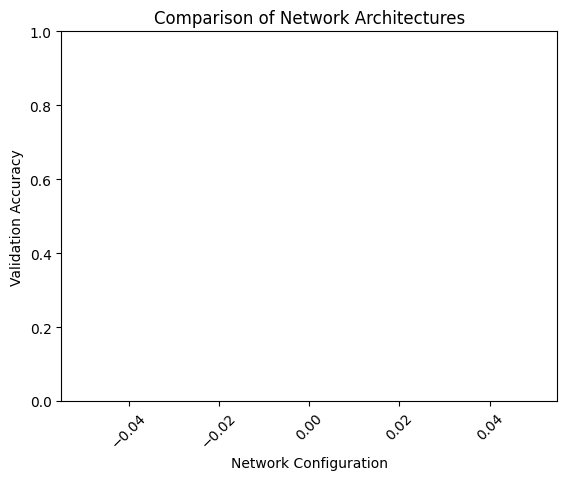

In [56]:
# Plot accuracies
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'orange'])
plt.ylabel("Validation Accuracy")
plt.xlabel("Network Configuration")
plt.title("Comparison of Network Architectures")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()
